In [55]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

# Basic Matrix Transformation Examples
---
This file contains a couple of illustrations of linear transformations, using the PIL library, numpy, and pyplot. If you're new to `.ipynb` notebooks, just make sure you run *all* the cells (including the `import`s above) to make sure you have the resources available to do the calculations involved.

**Confession/Disclaimer**: the way I'm *getting* to a visualization is *really* hacky and I haven't taken time to cultivate a great command of exactly how these image affine transformations are interpreted. Nevertheless, I've hacked my way to the transformations I *want* to illustrate, and I'll try to indicate that with each example (in TeX).

## Contents
---
[Illustration 1: The identity](#Illustration-1:-The-identity-matrix)  
[Illustration 2: Symmetric scaling](#Illustration-2:-Symmetric-scaling)  
[Illustration 3: Asymmetric scaling](#Illustration-3:-Asymmetric-scaling)  
[Illustration 4: Shear](#Illustration-4:-Shear)  
[Illustration 5: Reflections](#Illustration-5:-Reflections)  
[Illustration 6: Rotation](#Illustration-6:-Rotation)  
[Illustration 7: Rotation and flip](#Illustration-7:-Rotation-and-flip)  
[Illustration 8: Flip and rotation](#Illustration-8:-Flip-and-rotation)  

## Illustration 1: The identity matrix
---
Here we want to show the operation of the $2 \times 2$ identity matrix:

$$
\left[
    \begin{array}{rrr}
      1 & 0 \\
      0 & 1
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]
$$

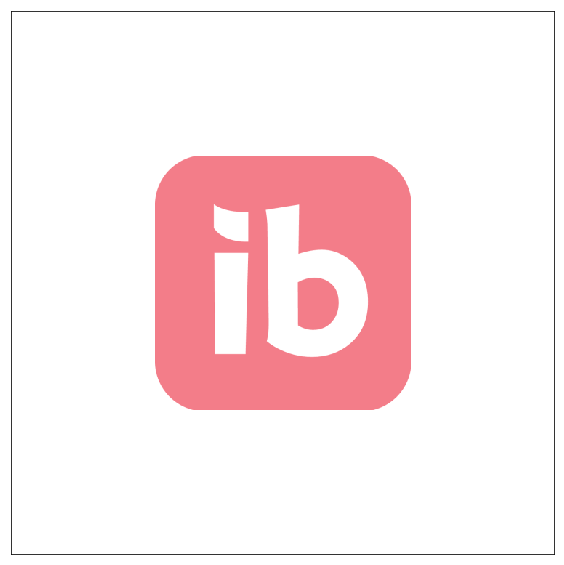

In [56]:
# base transform trial (Identity)

# recenter transformed
T_recenter = np.array([  
    [1, 0, 175],
    [0, 1, 175],
    [0, 0, 1]])
# flip
T_flip_original = np.array([  
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]])
# center original to 0,0
T_center = np.array([  
    [1, 0, -175],
    [0, 1, -175],
    [0, 0, 1]])
T = T_recenter @ T_flip_original @ T_center  
T_inv = np.linalg.inv(T) 

img = Image.open('ibotta-app-icon.png')
img_transformed = img.transform((750, 750), Image.AFFINE, data=T.flatten()[:6], resample=Image.NEAREST)

width, height = img_transformed.size
for x in range(width):
    for y in range(height):
        r,g,b = img_transformed.getpixel((x,y))
        if r == 0 and g == 0 and b == 0:
            img_transformed.putpixel((x,y), (255, 255, 255))
            
plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img_transformed))

plt.xlim(-200,550)
plt.ylim(-200,550)

plt.xticks([]);
plt.yticks([]);

plt.show()

[Back to Contents](#Contents)

## Illustration 2: Symmetric scaling
---
In this example, we'll illustrate the action of a uniform scaling matrix.

$$
\left[
    \begin{array}{rrr}
      2 & 0 \\
      0 & 2
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]
$$

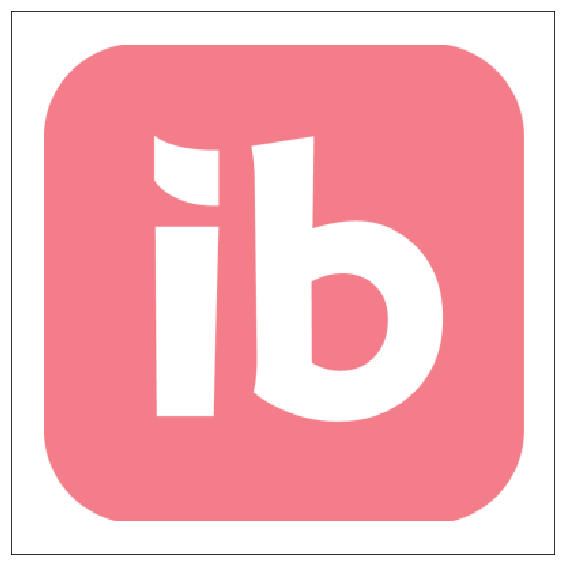

In [57]:
# base transform trial (symmetric scaling matrix)

# recenter transformed
T_recenter = np.array([  
    [1, 0, 175],
    [0, 1, 175],
    [0, 0, 1]])
# flip
T_flip_original = np.array([  
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]])
# center original to 0,0
T_center = np.array([  
    [1, 0, -175],
    [0, 1, -175],
    [0, 0, 1]])
T = T_recenter @ T_flip_original @ T_center  
T_inv = np.linalg.inv(T) 

img = Image.open('ibotta-app-icon.png')
img_transformed = img.transform((750, 750), Image.AFFINE, data=T.flatten()[:6], resample=Image.NEAREST)

width, height = img_transformed.size
for x in range(width):
    for y in range(height):
        r,g,b = img_transformed.getpixel((x,y))
        if r == 0 and g == 0 and b == 0:
            img_transformed.putpixel((x,y), (255, 255, 255))
            
plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img_transformed))

plt.xlim(-25,375)
plt.ylim(-25,375)

plt.xticks([]);
plt.yticks([]);

plt.show()

[Back to Contents](#Contents)

## Illustration 3: Asymmetric scaling
---
Next we'll scale one component of the vector but not the other:

$$
\left[
    \begin{array}{rrr}
      1 & 0 \\
      0 & 2
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]
$$

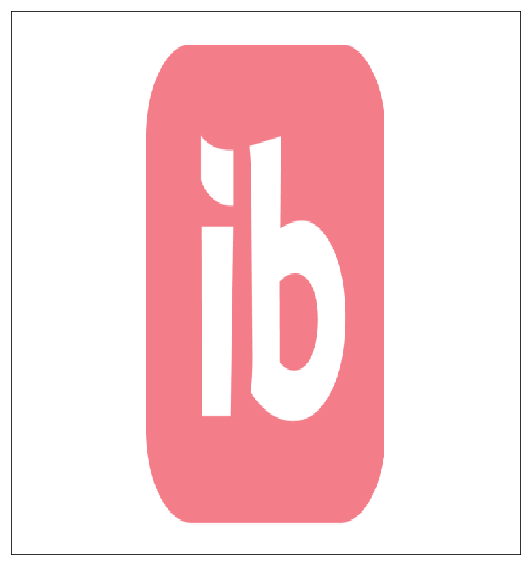

In [58]:
# asymmetric scale trial (hacky illustration with aspect ratios)

# recenter transformed
T_recenter = np.array([  
    [1, 0, 175],
    [0, 1, 300],
    [0, 0, 1]])
# flip
T_flip_original = np.array([  
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]])
# center original to 0,0
T_center = np.array([  
    [1, 0, -175],
    [0, 1, -175],
    [0, 0, 1]])
T = T_recenter @ T_flip_original @ T_center

img = Image.open('ibotta-app-icon.png')
img_transformed = img.transform((350, 700), Image.AFFINE, data=T.flatten()[:6], resample=Image.NEAREST)

width, height = img_transformed.size
for x in range(width):
    for y in range(height):
        r,g,b = img_transformed.getpixel((x,y))
        if r == 0 and g == 0 and b == 0:
            img_transformed.putpixel((x,y), (255, 255, 255))
            
plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img_transformed))

plt.xlim(-200,550)
plt.ylim(100,500)
plt.axes().set_aspect(2)

plt.xticks([]);
plt.yticks([]);

plt.show()

[Back to Contents](#Contents)

## Illustration 4: Shear
---
We can also show a shear transformation.

$$
\left[
    \begin{array}{rrr}
      1 & 1 \\
      0 & 1
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]
$$

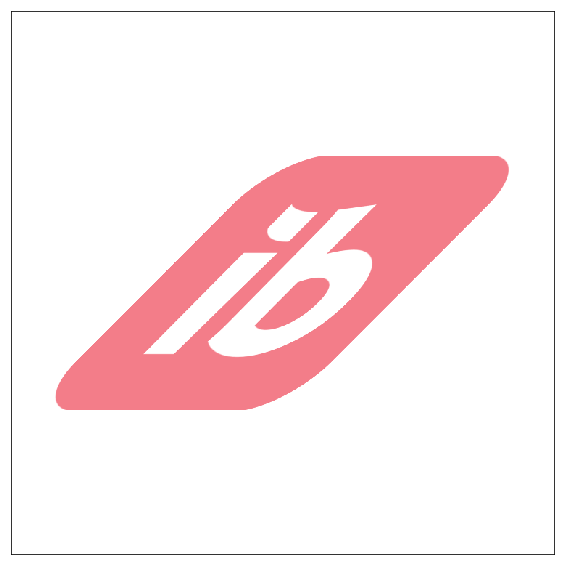

In [59]:
# shear transform trial

# recenter transformed
T_recenter = np.array([  
    [1, 0, 0],
    [0, 1, 175],
    [0, 0, 1]])
# flip
T_flip_original = np.array([  
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]])
# shear
T_shear = np.array([  
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1]])
# center original to 0,0
T_center = np.array([  
    [1, 0, -175],
    [0, 1, -175],
    [0, 0, 1]])
T = T_recenter @ T_shear @ T_flip_original @ T_center

img = Image.open('ibotta-app-icon.png')
img_transformed = img.transform((750, 750), Image.AFFINE, data=T.flatten()[:6], resample=Image.NEAREST)

width, height = img_transformed.size
for x in range(width):
    for y in range(height):
        r,g,b = img_transformed.getpixel((x,y))
        if r == 0 and g == 0 and b == 0:
            img_transformed.putpixel((x,y), (255, 255, 255))
            
plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img_transformed))

plt.xlim(-25,725)
plt.ylim(-200,550)

plt.xticks([]);
plt.yticks([]);

plt.show()

[Back to Contents](#Contents)

## Illustration 5: Reflections
---
Another transformation we can complete is to reflect one or both components of a vector.

$$
\left[
    \begin{array}{rrr}
      -1 & 0 \\
      0 & 1
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]
$$

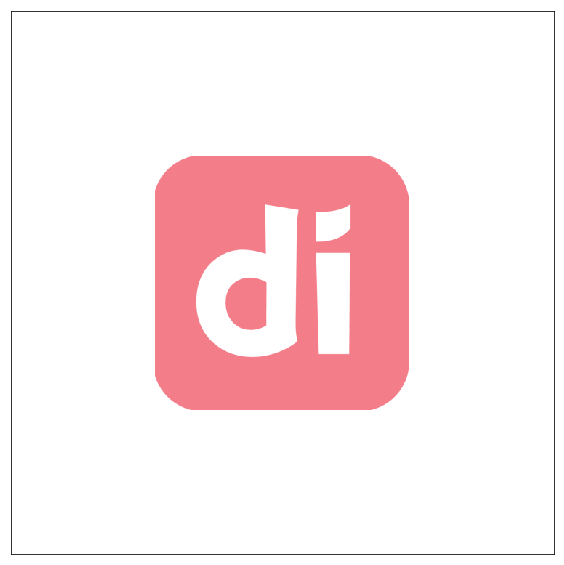

In [60]:
# fliplr trial

# recenter transformed
T_recenter = np.array([  
    [1, 0, 175],
    [0, 1, 175],
    [0, 0, 1]])
# fliplr
T_flip_lr = np.array([  
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]])
# flip
T_flip_original = np.array([  
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]])
# center original to 0,0
T_center = np.array([  
    [1, 0, -175],
    [0, 1, -175],
    [0, 0, 1]])
T = T_recenter @ T_flip_lr @ T_flip_original @ T_center

img = Image.open('ibotta-app-icon.png')
img_transformed = img.transform((750, 750), Image.AFFINE, data=T.flatten()[:6], resample=Image.NEAREST)

width, height = img_transformed.size
for x in range(width):
    for y in range(height):
        r,g,b = img_transformed.getpixel((x,y))
        if r == 0 and g == 0 and b == 0:
            img_transformed.putpixel((x,y), (255, 255, 255))
            
plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img_transformed))

plt.xlim(-200,550)
plt.ylim(-200,550)

plt.xticks([]);
plt.yticks([]);

plt.show()

[Back to Contents](#Contents)

## Illustration 6: Rotation
---
In this example, we'll rotate by 45 degrees ($\pi/4$ radians) counterclockwise.

$$
\left[
    \begin{array}{rrr}
      \sqrt{0.5} & -\sqrt{0.5} \\
      \sqrt{0.5} & \sqrt{0.5}
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]
$$

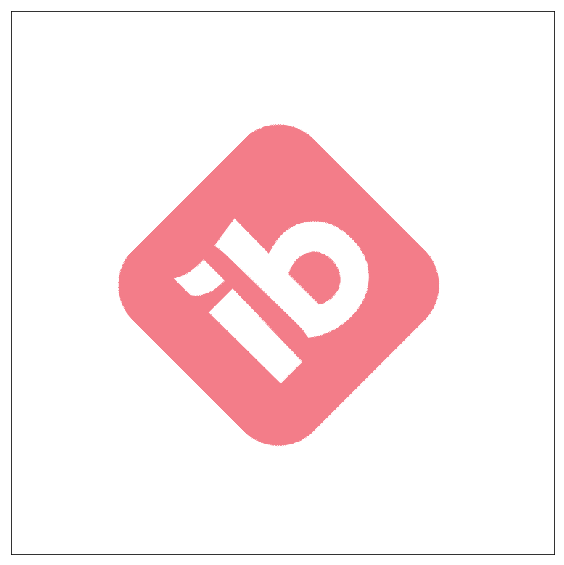

In [61]:
# rotate trial (45 degrees)

# recenter transformed
T_recenter = np.array([  
    [1, 0, -100],
    [0, 1, 0],
    [0, 0, 1]])
# rotate
T_rotate = np.array([  
    [0.5**0.5, -0.5**0.5, 0],
    [0.5**0.5, 0.5**0.5, 0],
    [0, 0, 1]])
# flip
T_flip_original = np.array([  
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]])
# center original to 0,0
T_center = np.array([  
    [1, 0, -175],
    [0, 1, -175],
    [0, 0, 1]])
T = T_recenter @ T_rotate @ T_flip_original @ T_center

img = Image.open('ibotta-app-icon.png')
img_transformed = img.transform((750, 750), Image.AFFINE, data=T.flatten()[:6], resample=Image.NEAREST)

width, height = img_transformed.size
for x in range(width):
    for y in range(height):
        r,g,b = img_transformed.getpixel((x,y))
        if r == 0 and g == 0 and b == 0:
            img_transformed.putpixel((x,y), (255, 255, 255))
            
plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img_transformed))

plt.xlim(125,875)
plt.ylim(-125,625)

plt.xticks([]);
plt.yticks([]);

plt.show()

[Back to Contents](#Contents)

## Illustration 7: Rotation and flip
---
We'll first rotate by 45 degrees counterclockwise, then flip left-to-right.

$$
\left[
    \begin{array}{rrr}
      -1 & 0 \\
      0 & 1
    \end{array}
  \right]
\left[
    \begin{array}{rrr}
      \sqrt{0.5} & -\sqrt{0.5} \\
      \sqrt{0.5} & \sqrt{0.5}
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]=
  \left[
    \begin{array}{rrr}
      -\sqrt{0.5} & \sqrt{0.5} \\
      \sqrt{0.5} & \sqrt{0.5}
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]
$$

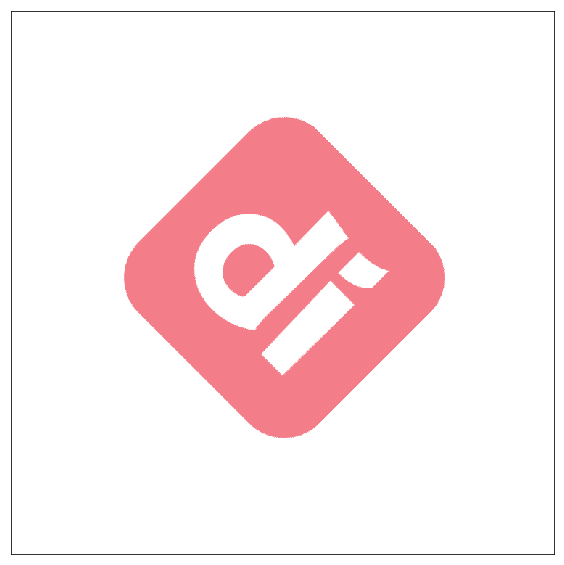

In [62]:
# rotate-then-fliplr trial (hacky)

# recenter transformed
T_recenter = np.array([  
    [1, 0, 350],
    [0, 1, 500],
    [0, 0, 1]])
# rotate
T_rotate = np.array([  
    [0.5**0.5, -0.5**0.5, 0],
    [0.5**0.5, 0.5**0.5, 0],
    [0, 0, 1]])
# fliplr
T_flip_lr = np.array([  
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]])
# flip
T_flip_original = np.array([  
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]])
# center original to 0,0
T_center = np.array([  
    [1, 0, -175],
    [0, 1, -175],
    [0, 0, 1]])
T = T_recenter  @ T_rotate @ T_flip_lr @ T_flip_original @ T_center

img = Image.open('ibotta-app-icon.png')
img_transformed = img.transform((750, 750), Image.AFFINE, data=T.flatten()[:6], resample=Image.NEAREST)

width, height = img_transformed.size
for x in range(width):
    for y in range(height):
        r,g,b = img_transformed.getpixel((x,y))
        if r == 0 and g == 0 and b == 0:
            img_transformed.putpixel((x,y), (255, 255, 255))
            
plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img_transformed))

plt.xlim(150,900)
plt.ylim(-100,650)

plt.xticks([]);
plt.yticks([]);

plt.show()

[Back to Contents](#Contents)

## Illustration 8: Flip and rotation
---
To illustrate non-commutivity, we'll first flip left-to-right, then rotate by 45 degrees counterclockwise (opposite of the last transformation's order). 

$$
\left[
    \begin{array}{rrr}
      \sqrt{0.5} & -\sqrt{0.5} \\
      \sqrt{0.5} & \sqrt{0.5}
    \end{array}
  \right]
\left[
    \begin{array}{rrr}
      -1 & 0 \\
      0 & 1
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]=
  \left[
    \begin{array}{rrr}
      -\sqrt{0.5} & -\sqrt{0.5} \\
      -\sqrt{0.5} & \sqrt{0.5}
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      x\\y
    \end{array}
  \right]
$$

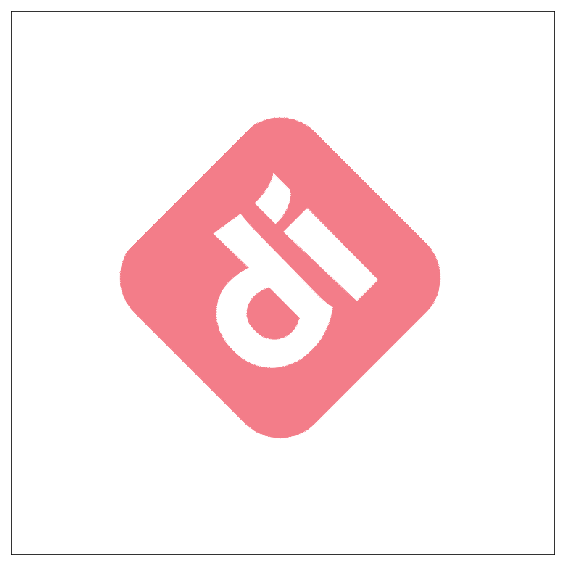

In [63]:
# fliplr-then-rotate trial (hacky)

# recenter transformed
T_recenter = np.array([  
    [1, 0, 550],
    [0, 1, 200],
    [0, 0, 1]])
# rotate
T_rotate = np.array([  
    [0.5**0.5, -0.5**0.5, 0],
    [0.5**0.5, 0.5**0.5, 0],
    [0, 0, 1]])
# fliplr
T_flip_lr = np.array([  
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]])
# flip
T_flip_original = np.array([  
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]])
# center original to 0,0
T_center = np.array([  
    [1, 0, -175],
    [0, 1, -175],
    [0, 0, 1]])
T = T_recenter @ T_flip_lr @ T_rotate @ T_flip_original @ T_center

img = Image.open('ibotta-app-icon.png')
img_transformed = img.transform((750, 750), Image.AFFINE, data=T.flatten()[:6], resample=Image.NEAREST)

width, height = img_transformed.size
for x in range(width):
    for y in range(height):
        r,g,b = img_transformed.getpixel((x,y))
        if r == 0 and g == 0 and b == 0:
            img_transformed.putpixel((x,y), (255, 255, 255))
            
plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img_transformed))

plt.xlim(50,800)
plt.ylim(75,825)

plt.xticks([]);
plt.yticks([]);

plt.show()

[Back to Contents](#Contents)

## Miscellaneous: plot of complex-number-as-vector
---
In this (brief) section, I'm going to make a plot of a complex number (as a vector) in the complex plane.

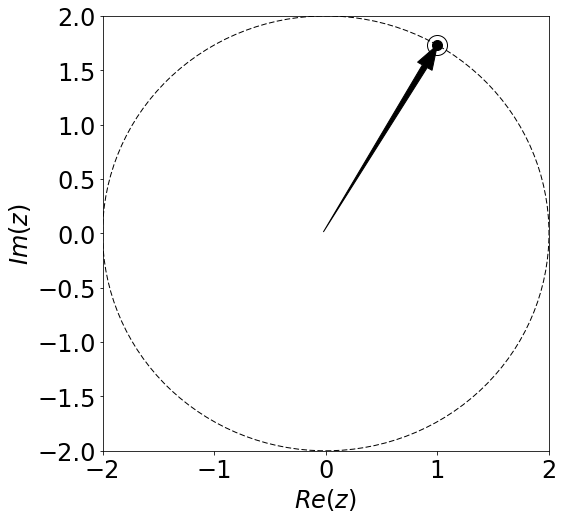

In [64]:
import matplotlib.patches as patches

plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 24

x = 1
y = 3**0.5

xOut = 1
yOut = 3**0.5

plt.arrow(0,0,1,3**0.5, width=0.05, length_includes_head=True, color='k')

point = plt.plot(x, y, 'o')
pointOut = plt.plot(x, y, 'o')
circle1 = plt.Circle((0, 0), 2, facecolor='None', edgecolor='k', linestyle='--')
plt.gcf().gca().add_artist(circle1)

plt.setp(point[0], markersize=10, color='k')
plt.setp(pointOut[0], markersize=20, mfc='None', mec='k')

plt.xlabel('$Re(z)$')
plt.ylabel('$Im(z)$')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()